In [3]:
!pip install catboost

   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.5/102.4 MB 1.2 MB/s eta 0:01:26
   ---------------------------------------- 0.8/102.4 MB 1.2 MB/s eta 0:01:28
   ---------------------------------------- 1.0/102.4 MB 1.2 MB/s eta 0:01:27
    --------------------------------------- 1.3/102.4 MB 1.2 MB/s eta 0:01:28
    --------------------------------------- 1.6/102.4 MB 1.2 MB/s eta 0:01:27
    --------------------------------------- 1.8/102.4 MB 1.2 MB/s eta 0:01:26
    --------------------------------------- 2.1/102.4 MB 1.2 MB/s eta 0:01:27
    --------------------------------------- 2.1/102.4 MB 1.2 MB/s eta 0:01:27
    --------------------------------------- 2.4/102.4 MB 1.1 MB/s eta 0:01:32
   - -------------------------------------- 2.6/102.4 MB 1.0 MB/s eta 0:01:36
   - --

In [1]:
!pip install xgboost

  Using cached xgboost-3.1.3-py3-none-win_amd64.whl.metadata (2.0 kB)
Using cached xgboost-3.1.3-py3-none-win_amd64.whl (72.0 MB)


Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

First we should call datasets from splitting section.

In [3]:
%store -r X_train
X_train = X_train

%store -r y_train
y_train = y_train

%store -r X_val
X_val=X_val

%store -r y_val
y_val = y_val

%store -r X_test
X_test = X_test

%store -r y_test
y_test = y_test

In the next section, based on each model, we define specific pipelines and build and train model.

In [4]:
def evaluate_model(X_train,y_train,X_val,y_val,model):
    kf=KFold(n_splits=5, shuffle=True, random_state=42)

    cross_val_r2 = cross_val_score(model,X_train,y_train,cv=kf,scoring='r2')
    cross_val_rmse = -cross_val_score(model,X_train,y_train,cv=kf,scoring='neg_root_mean_squared_error')

    print(f"Training CV R2: {cross_val_r2.mean():.4f}, Training CV RMSE: {cross_val_rmse.mean():.4f}")

    model.fit(X_train,y_train)

    y_train_pred=model.predict(X_train)
    y_val_pred=model.predict(X_val)

    r2_train = r2_score(y_train,y_train_pred)
    rmse_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
    r2_val = r2_score(y_val,y_val_pred)
    rmse_val=np.sqrt(mean_squared_error(y_val,y_val_pred))

    print(f"Training R2: {r2_train:.4f}, Training RMSE: {rmse_train:.4f}")
    print(f"Validation R2: {r2_val:.4f}, Validation RMSE: {rmse_val:.4f}")

Model Training

Linear Regression

In [5]:
model = Pipeline([
    ("scaler", StandardScaler()), # This algorithm needs scaling
    ("lin_reg", LinearRegression())
])

evaluate_model(X_train, y_train,X_val,y_val,model)

Training CV R2: 0.9991, Training CV RMSE: 95.2011
Training R2: 0.9991, Training RMSE: 95.8568
Validation R2: 0.9996, Validation RMSE: 63.3000


The model is not underfit(both CV and Validation are high) and overfit (CV and Validation are close to each other)

Decision Tree Regressor

In [6]:
model = Pipeline([
    ("DecisionTree_reg", DecisionTreeRegressor())
])

evaluate_model(X_train, y_train, X_val,y_val,model)

Training CV R2: 0.8918, Training CV RMSE: 1032.8716
Training R2: 1.0000, Training RMSE: 0.0000
Validation R2: 0.8998, Validation RMSE: 983.9581


Random Forest Regressor

In [7]:
model = Pipeline([
    ("RandomForest_reg", RandomForestRegressor())
])
evaluate_model(X_train,y_train, X_val,y_val, model)

Training CV R2: 0.9597, Training CV RMSE: 627.0468
Training R2: 0.9949, Training RMSE: 224.2674
Validation R2: 0.9625, Validation RMSE: 602.0515


Support Vector Regressor

In [8]:
model = Pipeline([
    ("scaler", StandardScaler()), #Scaling the features
    ("svr", SVR(kernel='rbf'))
])

evaluate_model(X_train, y_train,X_val,y_val,model)

Training CV R2: 0.0685, Training CV RMSE: 3027.3353
Training R2: 0.0862, Training RMSE: 2999.4412
Validation R2: 0.0855, Validation RMSE: 2971.9019


XGBoost Regressor

In [9]:
model = Pipeline([
    ("scaler", StandardScaler()), # scaling the features
    ("xgb", XGBRegressor(objective='reg:squarederror'))
])

evaluate_model(X_train,y_train,X_val,y_val,model)



Training CV R2: 0.9920, Training CV RMSE: 280.2197
Training R2: 0.9986, Training RMSE: 116.9903
Validation R2: 0.9928, Validation RMSE: 264.4133


CatBoost Regressor

In [10]:
model = Pipeline([
    ("catboost", CatBoostRegressor())
])

evaluate_model(X_train, y_train, X_val, y_val,model)

Learning rate set to 0.052996
0:	learn: 3002.5386655	total: 153ms	remaining: 2m 33s
1:	learn: 2890.4135878	total: 157ms	remaining: 1m 18s
2:	learn: 2774.6653173	total: 161ms	remaining: 53.7s
3:	learn: 2665.5842386	total: 166ms	remaining: 41.4s
4:	learn: 2567.5958915	total: 170ms	remaining: 33.9s
5:	learn: 2469.5098712	total: 175ms	remaining: 28.9s
6:	learn: 2376.9738903	total: 177ms	remaining: 25.1s
7:	learn: 2297.0043203	total: 180ms	remaining: 22.4s
8:	learn: 2215.1927629	total: 184ms	remaining: 20.3s
9:	learn: 2139.8163751	total: 190ms	remaining: 18.8s
10:	learn: 2063.5877621	total: 193ms	remaining: 17.3s
11:	learn: 1992.1604502	total: 195ms	remaining: 16.1s
12:	learn: 1923.5305228	total: 197ms	remaining: 15s
13:	learn: 1858.1751387	total: 200ms	remaining: 14.1s
14:	learn: 1799.7401392	total: 203ms	remaining: 13.3s
15:	learn: 1743.3864607	total: 205ms	remaining: 12.6s
16:	learn: 1686.5267358	total: 207ms	remaining: 12s
17:	learn: 1628.8700788	total: 209ms	remaining: 11.4s
18:	learn:

The model is not underfit(both CV and Validation are high) and overfit (CV and Validation are close to each other).

AdaBoost Regressor

In [11]:
model = Pipeline([
    ("adaboost", AdaBoostRegressor())
])

evaluate_model(X_train, y_train, X_val,y_val, model)

Training CV R2: 0.8858, Training CV RMSE: 1063.5814
Training R2: 0.8910, Training RMSE: 1036.0562
Validation R2: 0.8841, Validation RMSE: 1057.8928


The model is not underfit (both CV and Validation are high) and overfit (CV and Validation are close to each other)

Model Selection

based on the result of default model training, the best model is CatBoost with R2 0.9997 and RMSE $50.

In [12]:
best_model = CatBoostRegressor()
kf = KFold(n_splits=5,shuffle=True, random_state=42)

cross_val_r2 = cross_val_score(best_model, X_train,y_train, cv=kf,scoring='r2')
cross_val_rmse = -cross_val_score(best_model,X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
print(f"Training CV R2: {cross_val_r2.mean():.4f}, Training CV RMSE: {cross_val_rmse.mean():.4f}")

best_model.fit(X_train,y_train)
y_train_pred = best_model.predict(X_train)
y_val_pred=best_model.predict(X_val)

r2_train = r2_score(y_train, y_train_pred)
rmse_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
r2_val =r2_score(y_val,y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val,y_val_pred))

print(f"Training R2: {r2_train:.4f},Training RMSE: {rmse_train:.4f}")
print(f"Validation R2: {r2_val:.4f}, validation RMSE: {rmse_val:.4f}")

Learning rate set to 0.052996
0:	learn: 3002.5386655	total: 2.48ms	remaining: 2.48s
1:	learn: 2890.4135878	total: 4.69ms	remaining: 2.34s
2:	learn: 2774.6653173	total: 6.68ms	remaining: 2.22s
3:	learn: 2665.5842386	total: 8.6ms	remaining: 2.14s
4:	learn: 2567.5958915	total: 10.6ms	remaining: 2.11s
5:	learn: 2469.5098712	total: 12.6ms	remaining: 2.09s
6:	learn: 2376.9738903	total: 14.5ms	remaining: 2.05s
7:	learn: 2297.0043203	total: 16.1ms	remaining: 2s
8:	learn: 2215.1927629	total: 19.2ms	remaining: 2.11s
9:	learn: 2139.8163751	total: 21.1ms	remaining: 2.08s
10:	learn: 2063.5877621	total: 23.1ms	remaining: 2.07s
11:	learn: 1992.1604502	total: 25.3ms	remaining: 2.09s
12:	learn: 1923.5305228	total: 27ms	remaining: 2.05s
13:	learn: 1858.1751387	total: 29.2ms	remaining: 2.05s
14:	learn: 1799.7401392	total: 30.9ms	remaining: 2.03s
15:	learn: 1743.3864607	total: 32.7ms	remaining: 2.01s
16:	learn: 1686.5267358	total: 35ms	remaining: 2.02s
17:	learn: 1628.8700788	total: 37.1ms	remaining: 2.02

Tune Model with Hyper_Parameter

Now,in this section, we try to tune model and improve its performance.

In [13]:
param_grid = {
    'iterations': [100,200], #Number of boosting iterations
    'learning_rate': [0.01,0.05,0.1], #Step size at each iteration
    'depth': [4,6,8], # Depth of the Trees
    'l2_leaf_reg': [1,3,5], #L2 regularization coefficient
    'border_count': [32,64], # Number of splits in categorical features
}

grid_search=GridSearchCV(estimator=best_model,
                         param_grid=param_grid,
                         cv=5,
                         scoring='neg_root_mean_squared_error',
                         n_jobs=-1,
                         verbose=2
                         )
grid_search.fit(X_train,y_train)
print('Best parameters found:', grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
0:	learn: 2891.2346180	total: 3.5ms	remaining: 697ms
1:	learn: 2668.8933077	total: 7.25ms	remaining: 718ms
2:	learn: 2459.9756447	total: 10.3ms	remaining: 680ms
3:	learn: 2268.0262502	total: 13.9ms	remaining: 683ms
4:	learn: 2101.5786230	total: 17.3ms	remaining: 675ms
5:	learn: 1943.3093160	total: 20.4ms	remaining: 659ms
6:	learn: 1792.1020532	total: 24ms	remaining: 662ms
7:	learn: 1653.1111994	total: 27.7ms	remaining: 666ms
8:	learn: 1527.1311250	total: 31.6ms	remaining: 671ms
9:	learn: 1428.5181867	total: 35.2ms	remaining: 669ms
10:	learn: 1325.7906953	total: 38.8ms	remaining: 666ms
11:	learn: 1225.5528466	total: 42.7ms	remaining: 669ms
12:	learn: 1145.1798397	total: 46.6ms	remaining: 670ms
13:	learn: 1070.7260044	total: 49.7ms	remaining: 661ms
14:	learn: 998.3574971	total: 53.1ms	remaining: 655ms
15:	learn: 936.2662415	total: 56.4ms	remaining: 648ms
16:	learn: 872.7640039	total: 60.1ms	remaining: 647ms
17:	learn: 823.005

In [14]:
best_model_tuned=grid_search.best_estimator_

In [15]:
best_model_tuned=grid_search.best_estimator_
kf=KFold(n_splits=5,shuffle=True,random_state=42)

cross_val_r2=cross_val_score(best_model_tuned,X_train, y_train, cv=kf,scoring='r2')
cross_val_rmse=-cross_val_score(best_model_tuned,X_train,y_train,cv=kf,scoring='neg_root_mean_squared_error')
print(f"Training CV R2: {cross_val_r2.mean():.4f},Training CV RMSE: {cross_val_rmse.mean():.4f}")

best_model_tuned.fit(X_train,y_train)
y_train_pred=best_model_tuned.predict(X_train)
y_val_pred=best_model_tuned.predict(X_val)

r2_train = r2_score(y_train, y_train_pred)
rmse_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
r2_val = r2_score(y_val,y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val,y_val_pred))

print(f"Training R2:{r2_train:.4f},Training RMSE: {rmse_train:.4f}")
print(f"Validation R2: {r2_val:.4f}, Validation RMSE: {rmse_val:.4f}")

0:	learn: 2888.9038597	total: 2.89ms	remaining: 575ms
1:	learn: 2666.6848766	total: 7.49ms	remaining: 742ms
2:	learn: 2457.7945036	total: 10.5ms	remaining: 687ms
3:	learn: 2264.0649998	total: 13.5ms	remaining: 661ms
4:	learn: 2107.1511769	total: 16.2ms	remaining: 632ms
5:	learn: 1947.7858787	total: 18.5ms	remaining: 597ms
6:	learn: 1803.5933289	total: 20.6ms	remaining: 567ms
7:	learn: 1673.0132176	total: 23.3ms	remaining: 560ms
8:	learn: 1547.1883950	total: 25.4ms	remaining: 539ms
9:	learn: 1451.4864379	total: 27.4ms	remaining: 521ms
10:	learn: 1341.2997862	total: 29.3ms	remaining: 503ms
11:	learn: 1249.0347090	total: 31.2ms	remaining: 489ms
12:	learn: 1168.6492901	total: 33.3ms	remaining: 479ms
13:	learn: 1084.4820003	total: 35.3ms	remaining: 469ms
14:	learn: 1011.2906088	total: 38.3ms	remaining: 473ms
15:	learn: 937.0832152	total: 40.6ms	remaining: 466ms
16:	learn: 873.2688874	total: 42.8ms	remaining: 461ms
17:	learn: 818.7546156	total: 45.3ms	remaining: 458ms
18:	learn: 763.6390680	

Since, the tuned model is not better than default parameter, we conside default model as the final model.

In [16]:
final_model = best_model

Final Evaluation of Model

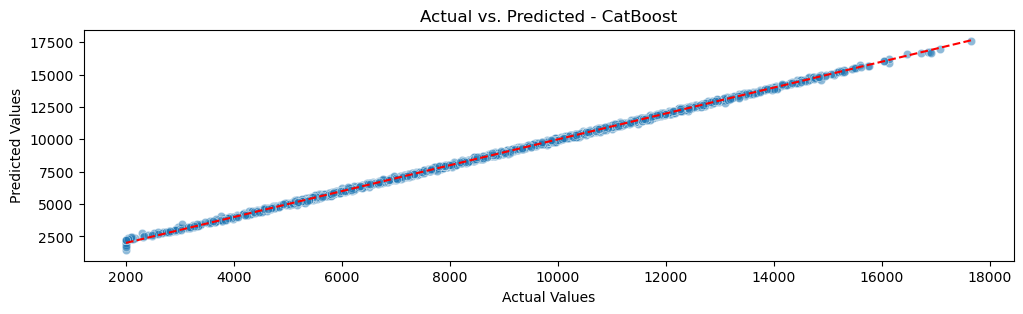

In [17]:
# Scatter Plot: Actual vs. Predicted
plt.figure(figsize=(12,3))

sns.scatterplot(x = y_val,
                y = y_val_pred,
                alpha = 0.5)
plt.plot([min(y_val),max(y_val)],[min(y_val), max(y_val)], '--', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted - CatBoost")
plt.show()


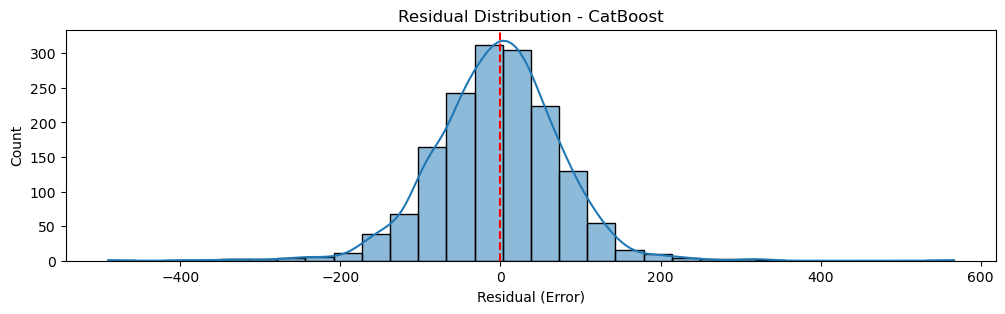

In [18]:
# Residual Plot (Errors)
residuals = y_val - y_val_pred

plt.figure(figsize = (12,3))
sns.histplot(residuals,bins=30,kde=True)
plt.axvline(0,color='red',linestyle='dashed')
plt.xlabel("Residual (Error)")
plt.title("Residual Distribution - CatBoost")
plt.show()

Apply Model On Test Data

Here, that we are happy with model of the project, we can predict the price on test data.But, before prediction, we need to encode categorical data (preprocessing we did)

In [19]:
with open('../../models/Brand_Encoder.pkl','rb') as f:
    brand_encoder = pickle.load(f) #Brand

with open('../../models/Model_Encoder.pkl','rb') as f:
    model_encoder = pickle.load(f) # Model

with open('../../models/OneHot_Encoder.pkl','rb') as f:
    onehot_encoder = pickle.load(f) #Fuel, Transmission

In the next step we should encode categorical features.

In [21]:
X_test['Encoded_Brand'] = X_test['Brand'].map(brand_encoder)
X_test['Encoded_Model'] = X_test['Model'].map(model_encoder)
X_test['Encoded_Brand'].fillna(X_test['Encoded_Brand'].mean(),inplace=True)
X_test['Encoded_Model'].fillna(X_test['Encoded_Model'].mean(),inplace=True)
X_test.drop(['Brand','Model'],axis=1,inplace=True)

#Encoding Fuel and Trnasmission
categorical_cols = ['Fuel','Transmission']
encoded_array_test = onehot_encoder.transform(X_test[categorical_cols])
encoded_df_test = pd.DataFrame(encoded_array_test, columns=onehot_encoder.get_feature_names_out(categorical_cols))

#Merge encoded columns with test data
X_test_encoded = X_test.drop(columns = categorical_cols).reset_index(drop=True)
X_test = pd.concat([X_test_encoded,encoded_df_test],axis=1)

Now, we can predict test data.

In [22]:
y_test_pred = final_model.predict(X_test)

r2_test = r2_score(y_test,y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))

print(f"test R2: {r2_test:.4f}, Test RMSE: {rmse_test:.4f}")

test R2: 0.9997, Test RMSE: 48.9199


The result shows model is good generalised and there is no overfitting/underfitting

Checkpoint

In [23]:
pickle.dump(final_model,open('../../models/Model.pkl','wb'))